In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
df=pd.read_csv('train_wids.csv')
warnings.filterwarnings("ignore")

#### My functions

In [29]:
def splitcategories(df):
    nums=df._get_numeric_data().columns
    cats=list(set(df.columns)-set(nums))
    return nums,cats

def filterColsbyNA(df,num):
    df.shape
    temp=pd.DataFrame(df.isna().sum()).reset_index()
    temp=temp.set_axis(['name','nullcount'],axis=1)
    temp['ratio']=temp.nullcount/df.shape[0]*100
    return temp.loc[temp.ratio>num].name.to_list()

def getsmallercols(df,limit):
    nums=df._get_numeric_data().columns.to_list()
    a=[]
    for col in nums:
        if df[col].value_counts().count() < limit:
            a.append(col)
    return a

## Data Cleaning

In [4]:
cols=df.columns.to_list()
nums,cats=splitcategories(df)
nacols=filterColsbyNA(df,10)

In [5]:
nacols

['energy_star_rating',
 'direction_max_wind_speed',
 'direction_peak_wind_speed',
 'max_wind_speed',
 'days_with_fog']

In [6]:
df[set(cols)-set(nacols)].isna().sum()

july_max_temp              0
may_min_temp               0
may_max_temp               0
may_avg_temp               0
june_max_temp              0
site_eui                   0
september_min_temp         0
days_above_100F            0
april_min_temp             0
Year_Factor                0
october_avg_temp           0
days_above_90F             0
days_above_110F            0
snowfall_inches            0
april_avg_temp             0
april_max_temp             0
avg_temp                   0
ELEVATION                  0
heating_degree_days        0
december_min_temp          0
precipitation_inches       0
november_avg_temp          0
december_avg_temp          0
february_avg_temp          0
january_avg_temp           0
june_min_temp              0
year_built              1837
august_max_temp            0
floor_area                 0
days_below_10F             0
february_max_temp          0
days_below_20F             0
september_max_temp         0
december_max_temp          0
june_avg_temp 

In [7]:
#Dropping NA values of 1837 from year_built
df1=df.loc[~df[set(cols)-set(nacols)].year_built.isna()]
# Target Variable is site_eui

<AxesSubplot:ylabel='site_eui'>

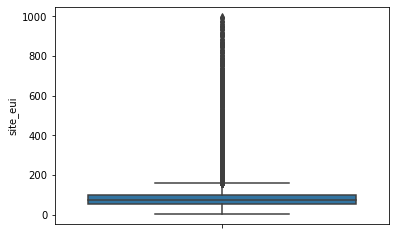

In [8]:
sns.boxplot(y=df1.site_eui)

#### As we can see that there are too many outliers in dependent variable,hence trimming by 93rd percentile

In [9]:
lower,upper=df1.site_eui.quantile([0,0.939])

<AxesSubplot:ylabel='site_eui'>

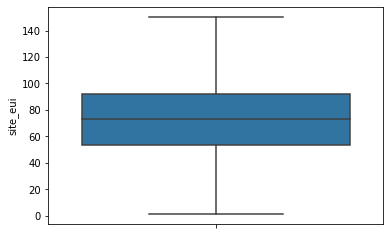

In [10]:
df2=df1.loc[(df1.site_eui>lower) & (df1.site_eui<upper)]
sns.boxplot(y=df2.site_eui)

#### Plot dependent variable after removing outliers

In [19]:
red=round((df2.shape[0]/df.shape[0])*100,2)
print("Total reduction in dataset size after Data Cleaning %f "%(100- red)+"%")
df2=df2[set(cols)-set(nacols)]
df2

Total reduction in dataset size after Data Cleaning 8.380000 %


,july_max_temp,may_min_temp,may_max_temp,may_avg_temp,june_max_temp,site_eui,september_min_temp,days_above_100F,april_min_temp,Year_Factor,...,building_class,days_above_80F,days_below_0F,september_avg_temp,id,State_Factor,january_min_temp,november_min_temp,facility_type,march_min_temp
1,84,46,84,56.854839,90,26.500150,52,0,41,1,...,Commercial,14,0,64.650000,1,State_1,36,43,Warehouse_Distribution_or_Shipping_center,40
2,84,46,84,56.854839,90,24.693619,52,0,41,1,...,Commercial,14,0,64.650000,2,State_1,36,43,Retail_Enclosed_mall,40
3,84,46,84,56.854839,90,48.406926,52,0,41,1,...,Commercial,14,0,64.650000,3,State_1,36,43,Education_Other_classroom,40
4,84,46,84,56.854839,90,3.899395,52,0,41,1,...,Commercial,14,0,64.650000,4,State_1,36,43,Warehouse_Nonrefrigerated,40
5,84,46,84,56.854839,90,6.597715,52,0,41,1,...,Commercial,14,0,64.650000,5,State_1,36,43,Warehouse_Selfstorage,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75751,87,45,88,59.193548,91,70.298783,44,0,40,6,...,Residential,25,0,61.383333,75751,State_11,28,40,2to4_Unit_Building,35
75752,87,45,88,59.193548,91,132.918411,44,0,40,6,...,Commercial,25,0,61.383333,75752,State_11,28,40,Office_Uncategorized,35
75753,87,45,88,59.193548,91,39.483672,44,0,40,6,...,Residential,25,0,61.383333,75753,State_11,28,40,5plus_Unit_Building,35
75754,81,40,79,52.145161,86,48.404398,41,0,34,6,...,Commercial,6,0,53.783333,75754,State_11,26,34,Commercial_Other,29


## Performing EDA

In [22]:
df2

,july_max_temp,may_min_temp,may_max_temp,may_avg_temp,june_max_temp,site_eui,september_min_temp,days_above_100F,april_min_temp,Year_Factor,...,building_class,days_above_80F,days_below_0F,september_avg_temp,id,State_Factor,january_min_temp,november_min_temp,facility_type,march_min_temp
1,84,46,84,56.854839,90,26.500150,52,0,41,1,...,Commercial,14,0,64.650000,1,State_1,36,43,Warehouse_Distribution_or_Shipping_center,40
2,84,46,84,56.854839,90,24.693619,52,0,41,1,...,Commercial,14,0,64.650000,2,State_1,36,43,Retail_Enclosed_mall,40
3,84,46,84,56.854839,90,48.406926,52,0,41,1,...,Commercial,14,0,64.650000,3,State_1,36,43,Education_Other_classroom,40
4,84,46,84,56.854839,90,3.899395,52,0,41,1,...,Commercial,14,0,64.650000,4,State_1,36,43,Warehouse_Nonrefrigerated,40
5,84,46,84,56.854839,90,6.597715,52,0,41,1,...,Commercial,14,0,64.650000,5,State_1,36,43,Warehouse_Selfstorage,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75751,87,45,88,59.193548,91,70.298783,44,0,40,6,...,Residential,25,0,61.383333,75751,State_11,28,40,2to4_Unit_Building,35
75752,87,45,88,59.193548,91,132.918411,44,0,40,6,...,Commercial,25,0,61.383333,75752,State_11,28,40,Office_Uncategorized,35
75753,87,45,88,59.193548,91,39.483672,44,0,40,6,...,Residential,25,0,61.383333,75753,State_11,28,40,5plus_Unit_Building,35
75754,81,40,79,52.145161,86,48.404398,41,0,34,6,...,Commercial,6,0,53.783333,75754,State_11,26,34,Commercial_Other,29


<AxesSubplot:xlabel='april_min_temp', ylabel='site_eui'>

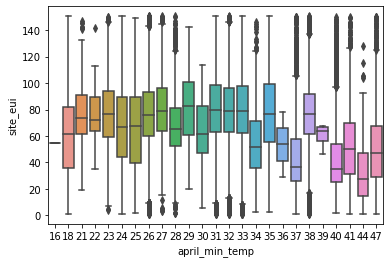

In [36]:
for col in getsmallercols(df2,30):
    sns.pairplot(data=df2,x=col,y='site_eui')
    plt.show()
    

TypeError: pairplot() got an unexpected keyword argument 'x'